In [123]:
# Question :-
# In this assignment candidate will train the model to detect the following:- 
# 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'.
# CIFAR-10 Dataset to be used for this Industry assignment.
# Remember :- we would need to do object detection and not classifciation.``
# Reference :- p1_2.ipynb in the main branch of DL folder.

### CIFAR dataset

The CIFAR-10 "Canadian Institute for Advanced Research 10" dataset is a popular benchmark dataset for training and evaluating machine learning models, especially Convolutional Neural Networks (CNNs), in the field of computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

In [124]:
# Importing all the necessary libraries

from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.applications import VGG19

import tensorflow
import matplotlib
import sklearn
import seaborn
import cv2
print(f"Tensorflow version:- {tensorflow.__version__}")
print(f"Matplotlib version:- {matplotlib.__version__}")
print(f"Numpy version:- {np.__version__}")
print(f"Scikit-learn :- {sklearn.__version__}")
print(f"Sebaorn :- {seaborn.__version__}")
print(f"opencv-python :- {cv2.__version__}")

Tensorflow version:- 2.13.0
Matplotlib version:- 3.7.2
Numpy version:- 1.24.3
Scikit-learn :- 1.3.0
Sebaorn :- 0.12.2
opencv-python :- 4.8.0


In [125]:
# Loading the data in train image, train labels and test image and test labels using load_data() method.

(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

The X_train_images array is a 4-dimensional NumPy array that holds the training images. Its shape is (num_samples, height, width, num_channels) where:

num_samples is the number of images in the training set.
height is the height of each image in pixels.
width is the width of each image in pixels.
num_channels is the number of color channels in each image (usually 3 for RGB images).
For the CIFAR-10 dataset specifically, X_train_images.shape would be something like (50000, 32, 32, 3), indicating that there are 50,000 training images, each with dimensions 32x32 pixels and 3 color channels (RGB).

In [126]:
# Dataset label numbers and there names

# 1 --> Airplane
# 2 --> Automobile
# 3 --> Bird
# 4 --> Cat
# 5 --> Deer
# 6 --> Dog
# 7 --> Frog
# 8 --> Horse
# 9 --> Ship
# 10 --> Truck

In [127]:
# Define class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Print labels and their corresponding class names
for label in y_train_labels[0:10:1]:  # Print the first 10 labels
    class_name = class_names[label[0]]
    print(f"Label: {label[0]} - Class Name: {class_name}")

Label: 6 - Class Name: Frog
Label: 9 - Class Name: Truck
Label: 9 - Class Name: Truck
Label: 4 - Class Name: Deer
Label: 1 - Class Name: Automobile
Label: 1 - Class Name: Automobile
Label: 2 - Class Name: Bird
Label: 7 - Class Name: Horse
Label: 8 - Class Name: Ship
Label: 3 - Class Name: Cat


In [128]:
# Display the information about the X_train_images

print(f"{' Information regarding the X_train_images ':#^70}", end = "\n\n")
print(f"X_train_images shape:- {X_train_images.shape}")
print(f"Number of sample images of X_train_images:- {X_train_images.shape[0]}")
print(f"X_train_images Image height :- {X_train_images.shape[1]}")
print(f"X_train_images Image width:- {X_train_images.shape[2]}")
print(f"X_train_images Colour channels:- {X_train_images.shape[3]}")
print(f"Shape of the first image in X_train_images:- {X_train_images[0].shape}")
print(f"Height of the first image in X_train_images:- {X_train_images[0].shape[0]}")
print(f"Width of the first image in X_train_images:- {X_train_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_train_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images and X_test_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_train_images:- { float(np.max(X_train_images[0])) }")
print(f"Minimum value of the X_train_images:- { float(np.min(X_train_images[0])) }")

############## Information regarding the X_train_images ##############

X_train_images shape:- (50000, 32, 32, 3)
Number of sample images of X_train_images:- 50000
X_train_images Image height :- 32
X_train_images Image width:- 32
X_train_images Colour channels:- 3
Shape of the first image in X_train_images:- (32, 32, 3)
Height of the first image in X_train_images:- 32
Width of the first image in X_train_images:- 32
Number of channels in the first image:- 3
Maximum value in X_train_images:- 255.0
Minimum value of the X_train_images:- 0.0


In [129]:
# Display the information of y_train_labels

print(f"{' Information of y_train_labels ':#^70}", end = "\n\n")
print(f"y_train_labels shape:- {y_train_labels.shape}")
print(f"Number of labels in the y_train_labels :- {y_train_labels.shape[0]}")
print(f"Labels of y_train_labels :- {y_train_labels.shape[1]}")
print("Number of classes:- ", len(set(y_train_labels.flatten()))) # (50000,)

################### Information of y_train_labels ####################

y_train_labels shape:- (50000, 1)
Number of labels in the y_train_labels :- 50000
Labels of y_train_labels :- 1
Number of classes:-  10


In [130]:
# Display the information about the X_test_images

print(f"{' Information regarding the X_test_images ':#^70}", end = "\n\n")
print(f"X_test_images shape:- {X_test_images.shape}")
print(f"Number of sample images of X_test_images:- {X_test_images.shape[0]}")
print(f"X_test_images Image height :- {X_test_images.shape[1]}")
print(f"X_test_images Image width:- {X_test_images.shape[2]}")
print(f"X_test_images Colour channels:- {X_test_images.shape[3]}")
print(f"Shape of the first image in X_test_images:- {X_test_images[0].shape}")
print(f"Height of the first image in X_test_images:- {X_test_images[0].shape[0]}")
print(f"Width of the first image in X_test_images:- {X_test_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_test_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_test_images:- { float(np.max(X_test_images[0])) }")
print(f"Minimum value of the X_test_images:- { float(np.min(X_test_images[0])) }")

############## Information regarding the X_test_images ###############

X_test_images shape:- (10000, 32, 32, 3)
Number of sample images of X_test_images:- 10000
X_test_images Image height :- 32
X_test_images Image width:- 32
X_test_images Colour channels:- 3
Shape of the first image in X_test_images:- (32, 32, 3)
Height of the first image in X_test_images:- 32
Width of the first image in X_test_images:- 32
Number of channels in the first image:- 3
Maximum value in X_test_images:- 255.0
Minimum value of the X_test_images:- 13.0


In [131]:
# Display the information of y_test_labels

print(f"{' Information of y_test_labels ':#^70}", end = "\n\n")
print(f"y_test_labels shape:- {y_test_labels.shape}")
print(f"Number of labels in the y_test_labels :- {y_test_labels.shape[0]}")
print(f"Labels of y_test_labels :- {y_test_labels.shape[1]}")
print("Number of classes:- ", len(set(y_test_labels.flatten()))) # (10000,)

#################### Information of y_test_labels ####################

y_test_labels shape:- (10000, 1)
Number of labels in the y_test_labels :- 10000
Labels of y_test_labels :- 1
Number of classes:-  10


In [132]:
# Preprocessing the train images and test images. 
# Normalizing the values from 0 to 255 to 0.0 to 1.0 
# using float of maximum in first image of X_train_images and X_test_images

X_train_images = X_train_images / float(np.max(X_train_images[0]))
X_test_images = X_test_images / float(np.max(X_test_images[0]))

In [133]:
# After processing of the image data

print("Maximum value of the train images:- ", np.max(X_train_images))
print("Minimum value of the train images:- ", np.min(X_train_images))

Maximum value of the train images:-  1.0
Minimum value of the train images:-  0.0


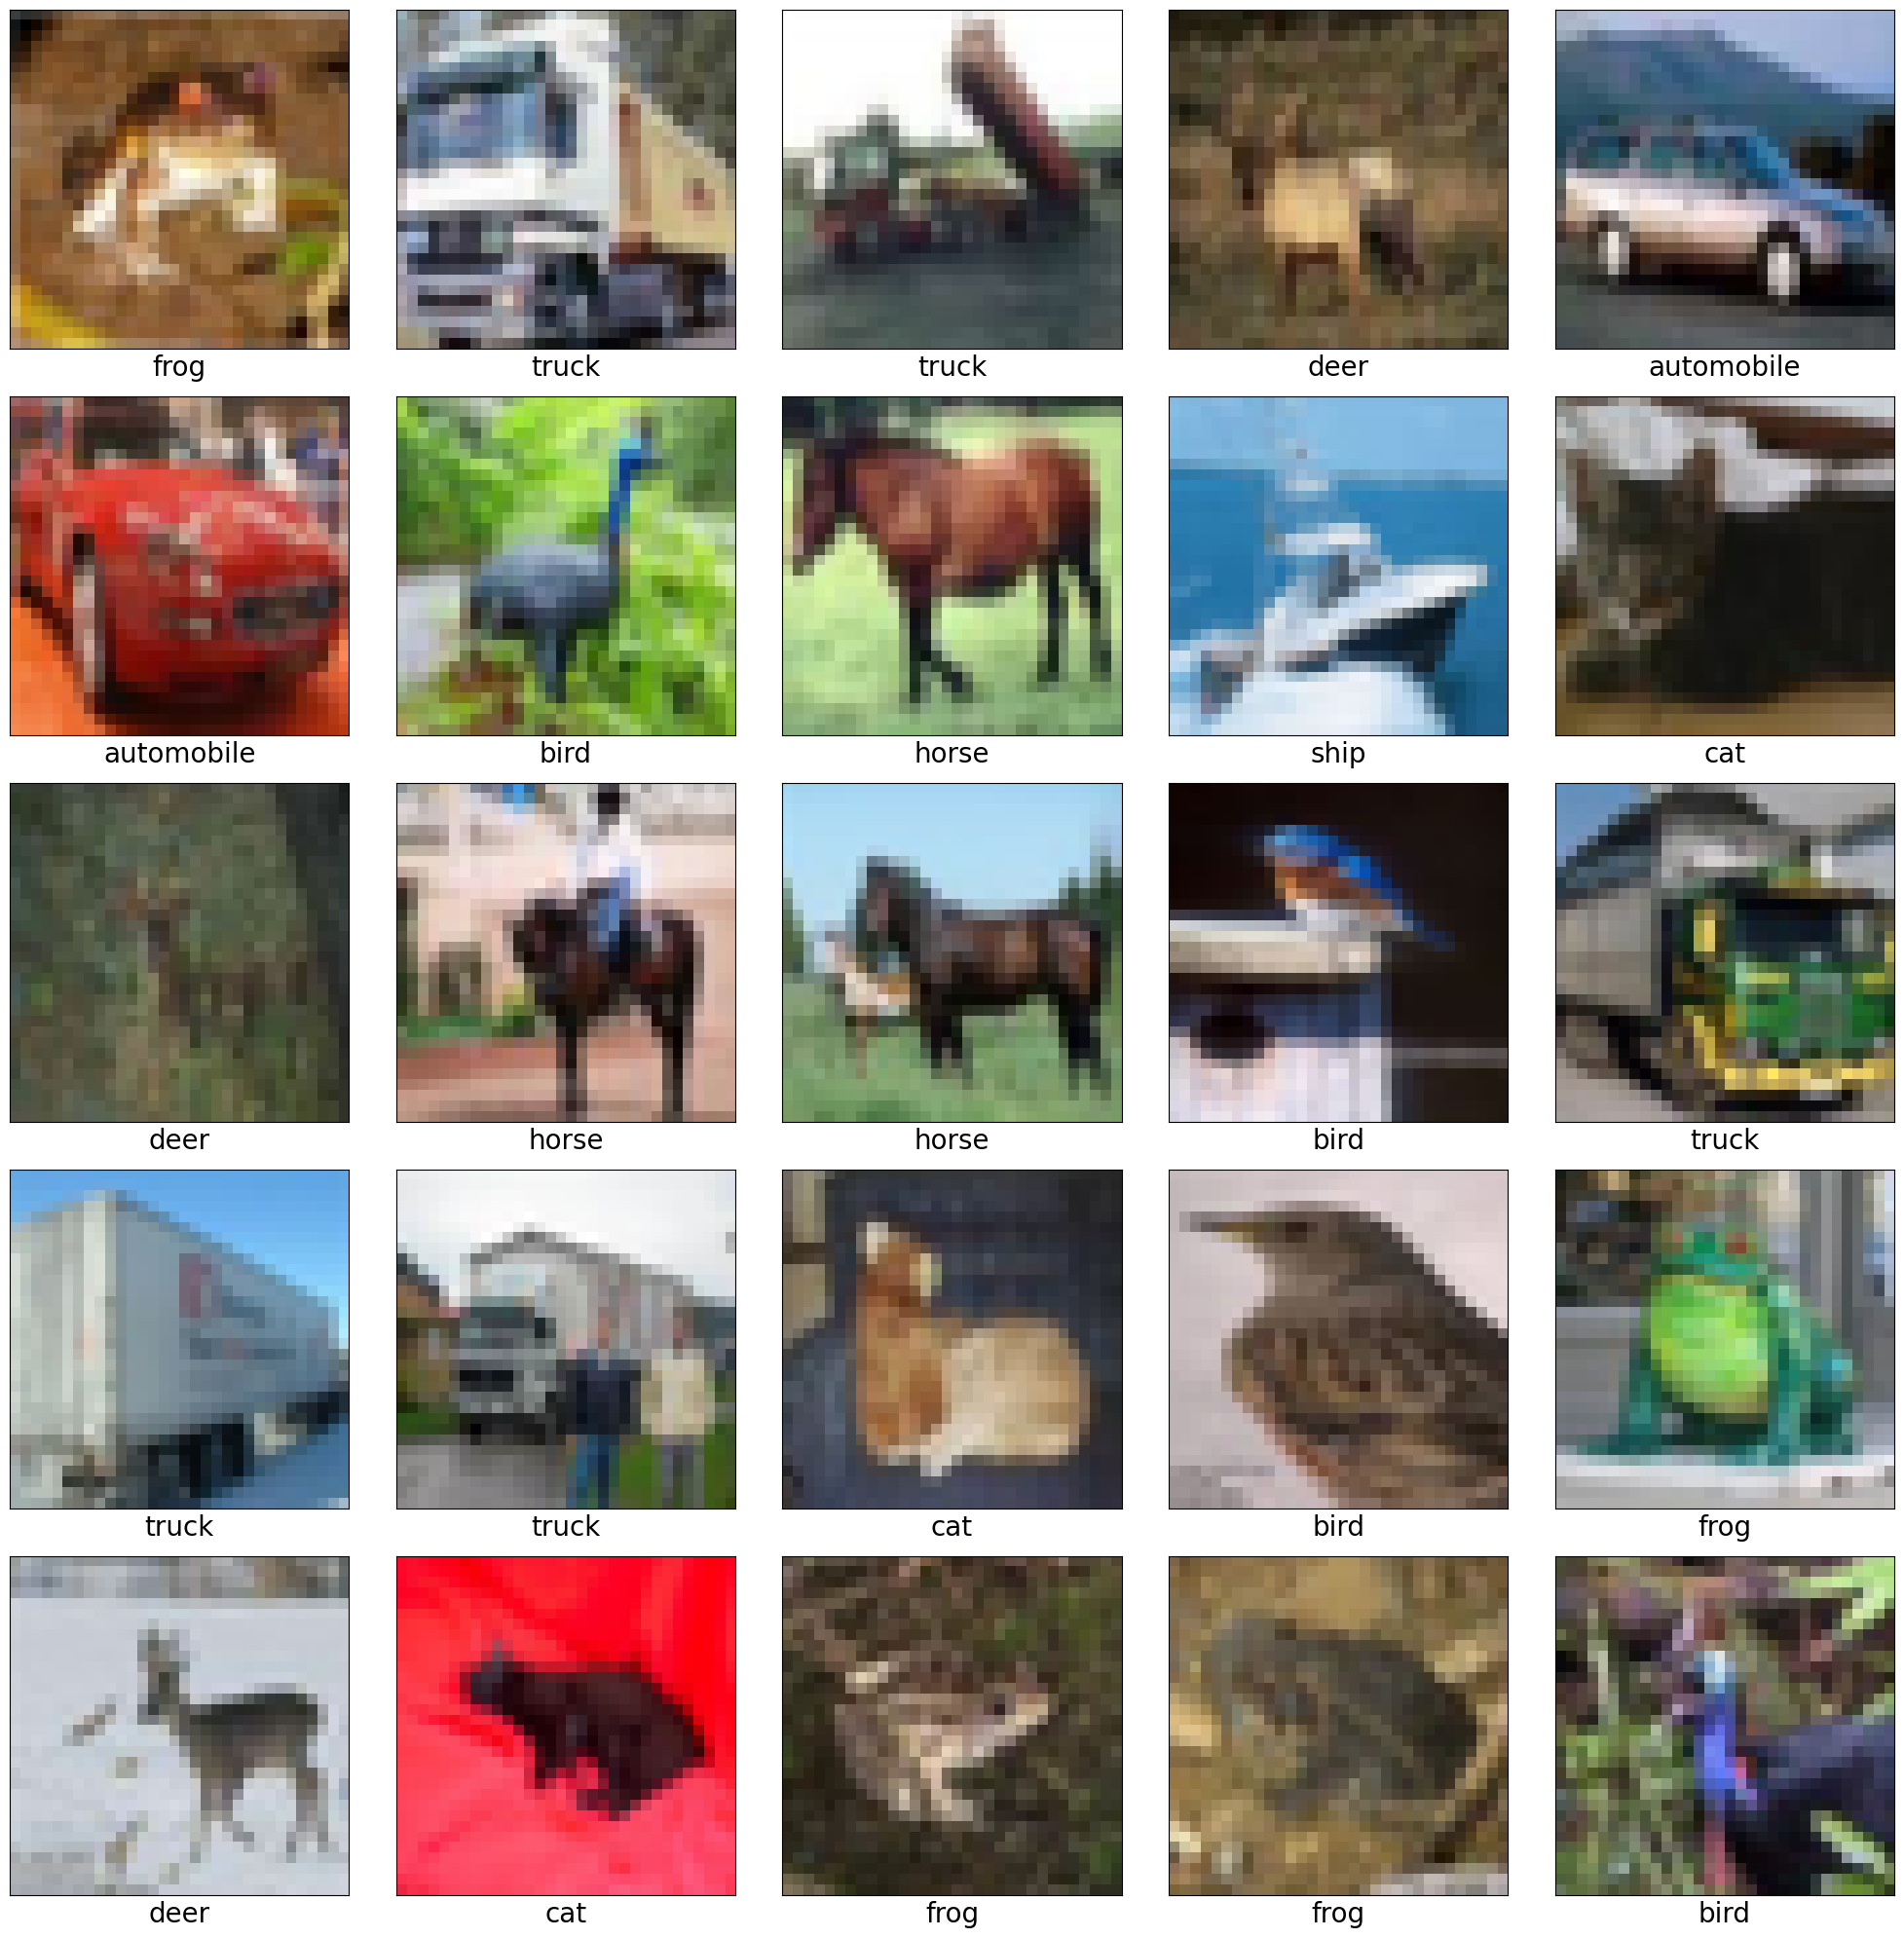

In [134]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

plt.tight_layout()
plt.show()

In [135]:
# Now!, We can proceed with the creation of the CNN model

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [136]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [137]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64
epochs = 2 # 10
history = model.fit(X_train_images, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images, y_test_labels))

Epoch 1/2


c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 48s 61ms/step - loss: 1.5878 - accuracy: 0.4191 - val_loss: 1.3345 - val_accuracy: 0.5200
Epoch 2/2
782/782 [==============================] - 45s 58ms/step - loss: 1.2460 - accuracy: 0.5547 - val_loss: 1.1946 - val_accuracy: 0.5704


In [138]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("IA_1_model.h5")

c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [139]:
model = load_model("IA_1_model.h5")

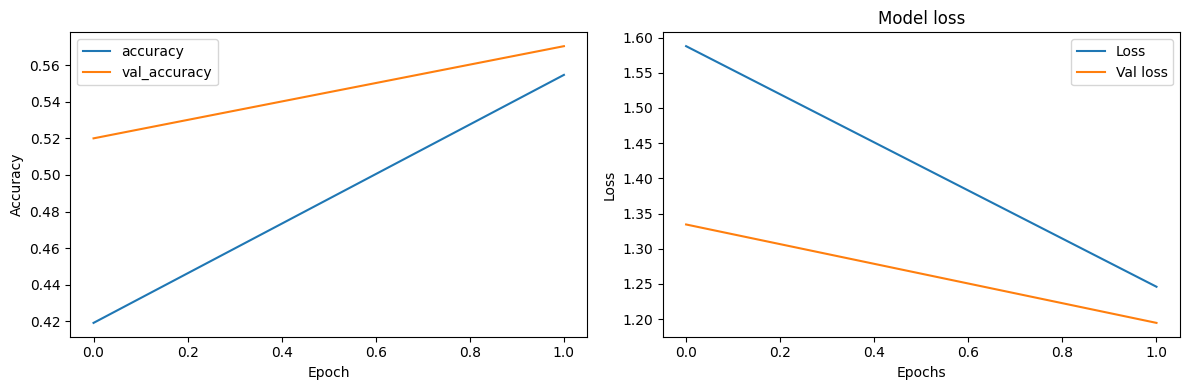

In [140]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [141]:
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels, verbose = 2)

313/313 - 3s - loss: 1.1946 - accuracy: 0.5704 - 3s/epoch - 9ms/step


In [142]:
print(f"{round(test_acc * 100, 3) } %")

57.04 %


In [143]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 3s 9ms/step
Classification report
              precision    recall  f1-score   support

           0       1.00      0.10      0.17     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.10      0.17     10000



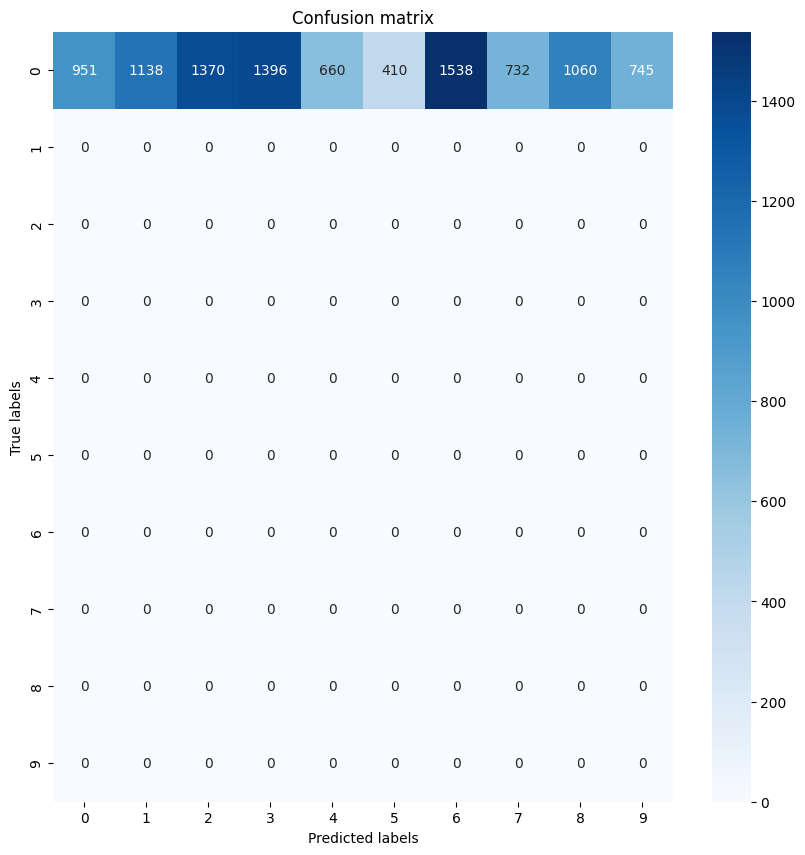

In [144]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()


313/313 [==============================] - 3s 9ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_10780\2603876897.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


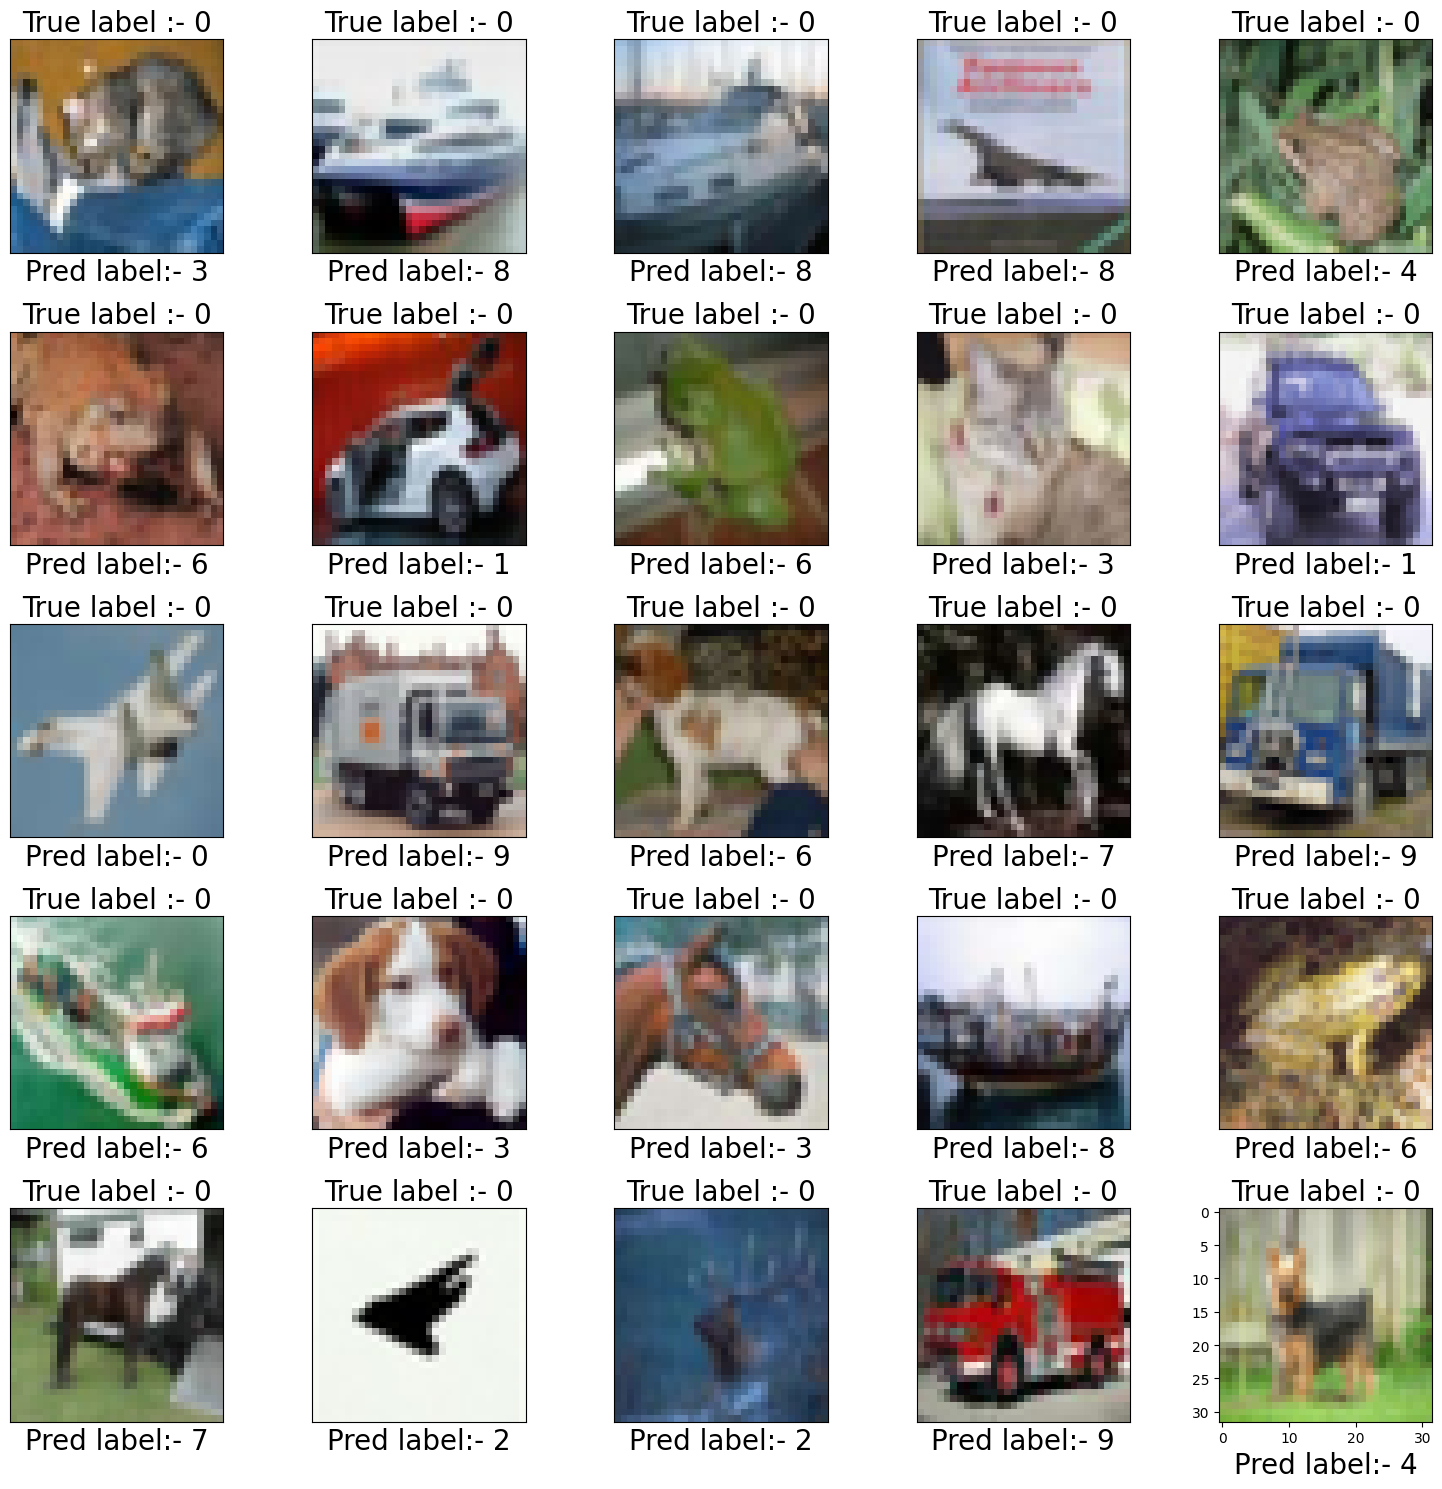

In [145]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

In [146]:
# # plot the model # https://graphviz.gitlab.io/download/
# # Download and run the graphviz-8.1.0 (64-bit) EXE installer [sha256] and 
# # click to checbox of add environment variable to all user and icon in desktop
# # pip install pydot and ( --> Seperate installation )pip install graphviz
# # Check in terminal `` dot -v `` for successful installation.
# plot_model(model, to_file = "p3_model_diagram.png", show_shapes = True, show_layer_names = True)

In [147]:
# Method 2:-
# Visualizing the NN model through netron
# pip install netron
# After successful installation type ```netron``` in terminal. It will open in localhost

In [148]:
# # Method 3 # Tensorboard method

# from tensorflow.keras.callbacks import TensorBoard

# # All callbacks will be saved in logs folder.
# model_callbacks = TensorBoard(log_dir = "p3_logs")

# model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

# model.fit(x = X_train_images, y = y_train_labels, 
#                 epochs = 5, validation_split = 0.1, 
#                 validation_data = (X_test_images, y_test_labels), 
#                 shuffle = True, callbacks = model_callbacks)

# # in terminal type :- tensorboard --logdir=p3_logs

In [149]:
3232 vdsadd

SyntaxError: invalid syntax (1352206045.py, line 1)

In [ ]:
# import tensorflow as tf

# # Load the CIFAR-10 dataset
# (X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

# # Convert to grayscale using tf.image.rgb_to_grayscale()
# X_train_images_gray = tf.image.rgb_to_grayscale(X_train_images)
# X_test_images_gray = tf.image.rgb_to_grayscale(X_test_images)

# # Convert to float32
# X_train_images_gray = tf.cast(X_train_images_gray, tf.float32)
# X_test_images_gray = tf.cast(X_test_images_gray, tf.float32)

# # Normalize grayscale pixel values between 0 and 1
# X_train_images_gray = X_train_images_gray / 255.0
# X_test_images_gray = X_test_images_gray / 255.0

# # Check max and min pixel values after normalization
# print("Maximum value of the train images:", np.max(X_train_images_gray))
# print("Minimum value of the train images:", np.min(X_train_images_gray))


Maximum value of the train images: 1.0
Minimum value of the train images: 0.0


In [150]:

# Load the CIFAR-10 dataset
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

# Convert to grayscale using cv2.cvtColor
X_train_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train_images])
X_test_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test_images])

# Normalize grayscale pixel values between 0 and 1
X_train_images_gray = X_train_images_gray / 255.0
X_test_images_gray = X_test_images_gray / 255.0

# Check max and min pixel values after normalization
print("Maximum value of the train images:", np.max(X_train_images_gray))
print("Minimum value of the train images:", np.min(X_test_images_gray))


Maximum value of the train images: 1.0
Minimum value of the train images: 0.0


In [151]:
X_train_images_gray = np.expand_dims(X_train_images_gray, axis = -1)
X_test_images_gray = np.expand_dims(X_test_images_gray, axis = -1)

In [152]:
print(X_train_images_gray.shape)
print(X_test_images_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


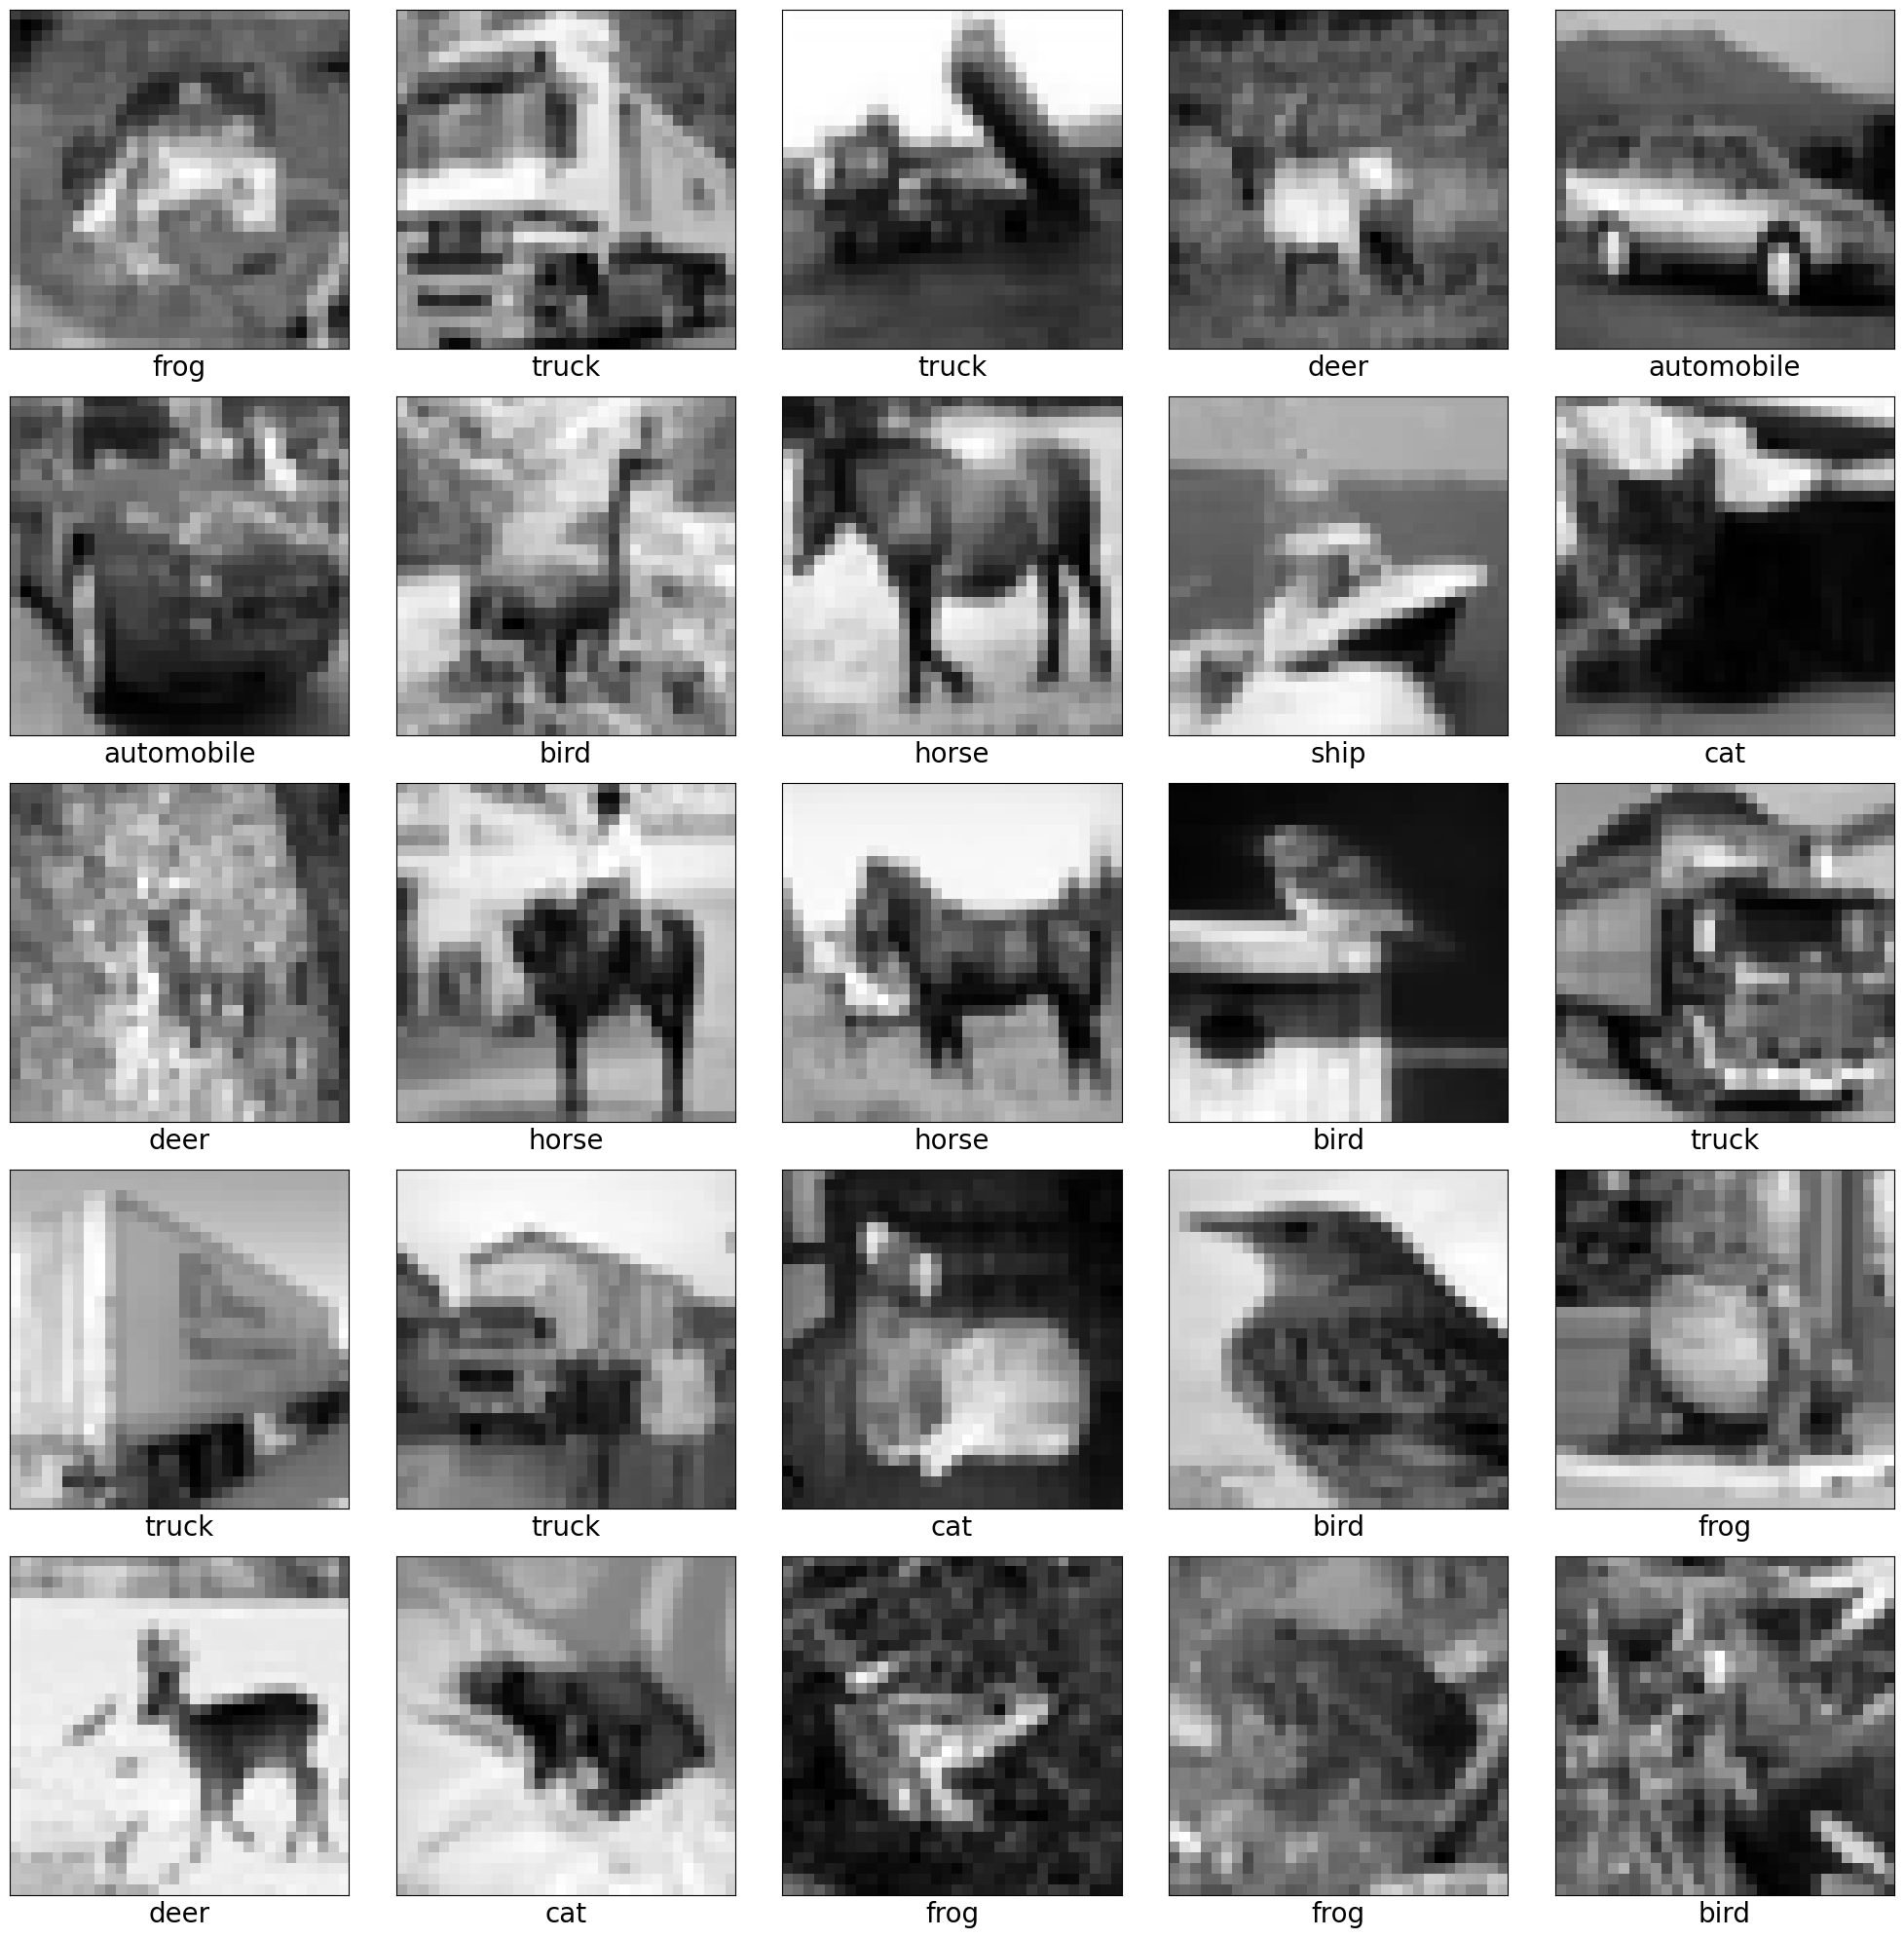

In [153]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images_gray[i], cmap = "gray")
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

plt.tight_layout()
plt.show()

In [157]:
# Now!, We can proceed with the creation of the CNN model on grey scale images

model = Sequential(
    [
        Conv2D(input_shape = (32, 32, 1), filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10, activation = "softmax")
    ]
)

In [158]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [159]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

# Train the model with batch size and epochs
batch_size = 64
epochs = 2
history = model.fit(X_train_images_gray, y_train_labels, batch_size = batch_size, epochs = epochs, validation_data = (X_test_images_gray, y_test_labels))

Epoch 1/2


c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 47s 59ms/step - loss: 1.7369 - accuracy: 0.3750 - val_loss: 1.4916 - val_accuracy: 0.4707
Epoch 2/2
782/782 [==============================] - 46s 59ms/step - loss: 1.3654 - accuracy: 0.5220 - val_loss: 1.2831 - val_accuracy: 0.5468


In [ ]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("IA_1_model.h5")

c:\IA_SEM_3\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("IA_1_model.h5")

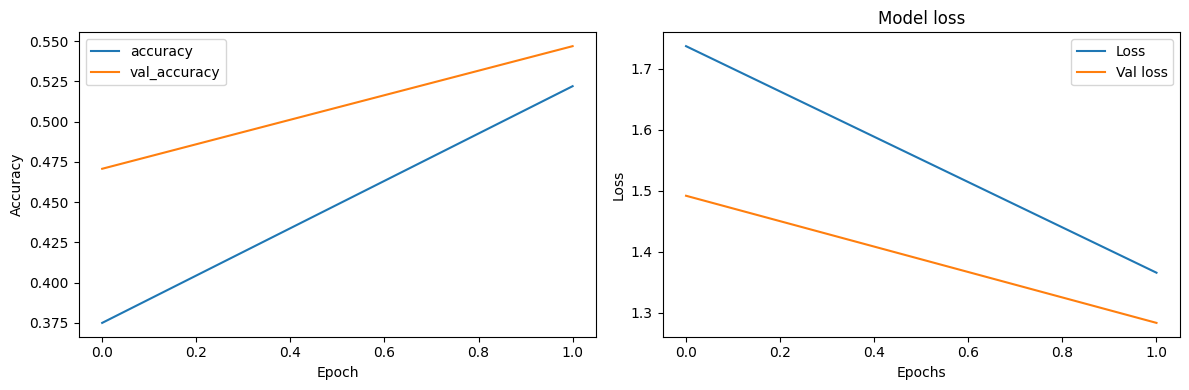

In [160]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot of model accuracy
ax1.plot(history.history["accuracy"], label="accuracy")
ax1.plot(history.history["val_accuracy"], label="val_accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label="Loss")
ax2.plot(history.history["val_loss"], label="Val loss")
ax2.set_title("Model loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc='upper right')

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()


In [161]:
test_loss, test_acc = model.evaluate(X_test_images_gray, y_test_labels, verbose = 2)

313/313 - 3s - loss: 1.2831 - accuracy: 0.5468 - 3s/epoch - 9ms/step


In [162]:
print(f"{round(test_acc * 100, 3) } %")

54.68 %


In [163]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels, zero_division=0))

313/313 [==============================] - 3s 9ms/step
Classification report
              precision    recall  f1-score   support

           0       1.00      0.08      0.15     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.08     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.08      0.15     10000



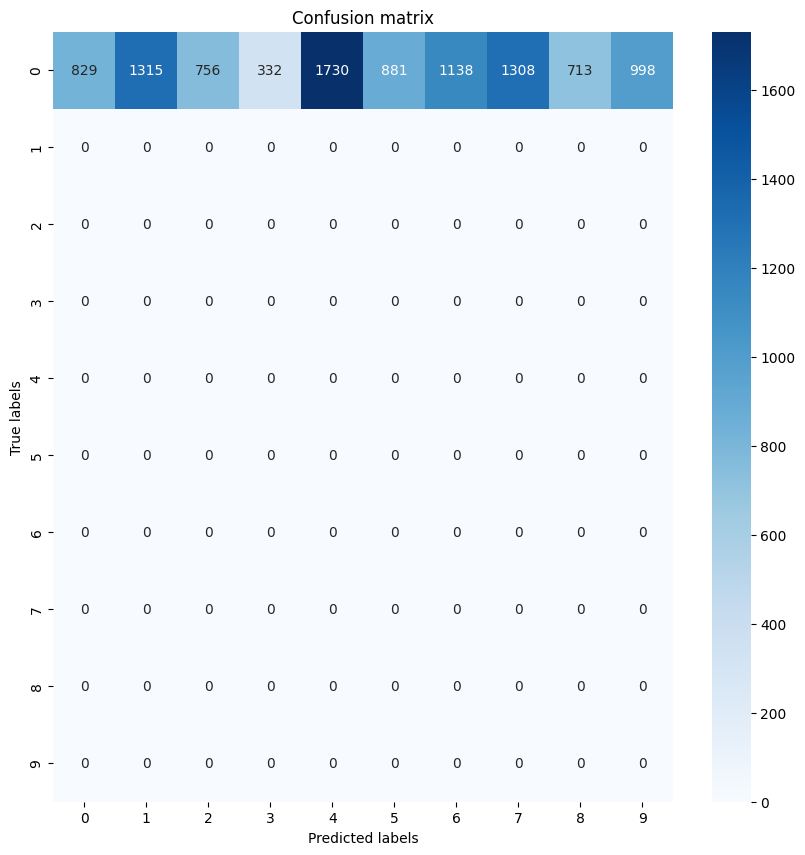

In [164]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

313/313 [==============================] - 3s 9ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_10780\3066298468.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


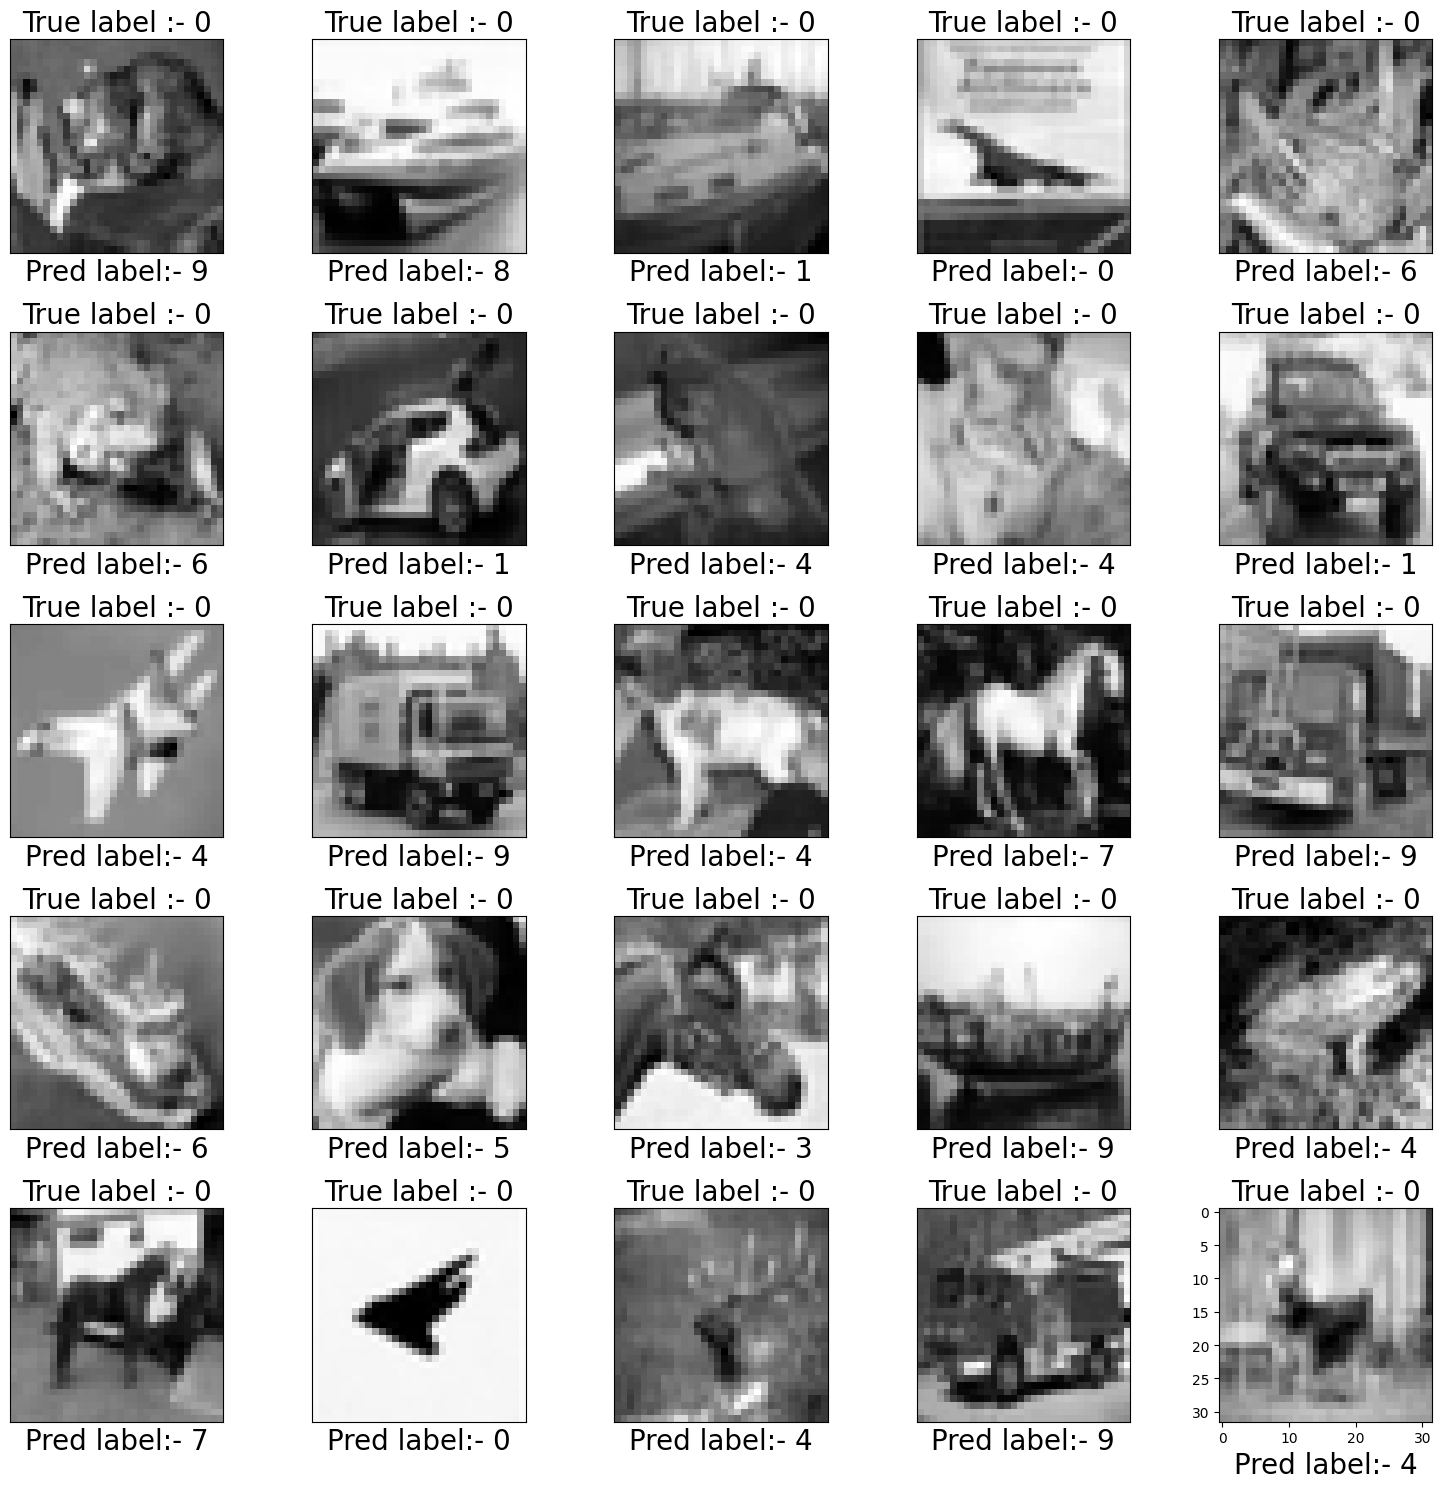

In [165]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images_gray)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images_gray[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

In [166]:
X_train_images_gray.shape

(50000, 32, 32, 1)

In [167]:
np.max(X_train_images_gray[0])

0.984313725490196

In [168]:
np.min(X_train_images_gray[0])

0.0

In [169]:
np.max(X_train_images_gray)

1.0

In [170]:
np.min(X_train_images_gray)

0.0

In [ ]:
# VGG16 or VGG19: VGG models have a straightforward architecture with repeated layers, 
# making them easy to fine-tune.

In [172]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create VGG19 model with pre-trained weights (excluding top layers)
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Add your own classification layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 20158282 (76.90 MB)
Trainable params: 20158282 (76.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
 70/704 [=>............................] - ETA: 55:42 - loss: 1.6642 - accuracy: 0.3991

KeyboardInterrupt: 